#### Reference
https://sparkbyexamples.com/spark/spark-dataframe-where-filter/

In [1]:
import pyspark    #Importing pyspark

In [2]:
from pyspark.sql import SparkSession                #Creating session
spark = SparkSession.builder.getOrCreate()

22/10/20 19:25:16 WARN Utils: Your hostname, Vinays-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 10.200.79.196 instead (on interface en0)
22/10/20 19:25:16 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/10/20 19:25:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/20 19:25:18 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


#### Defining the schema

In [3]:
from pyspark.sql.types import (StructType,                          
                                StructField, 
                                DateType, 
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                               TimestampType)


Chicago_schema = StructType([StructField('ID', StringType(), True),
                            StructField('CaseNumber', StringType(), True),
                            StructField('Date', StringType(), True ),
                            StructField('Block', StringType(), True),
                            StructField('IUCR', StringType(), True),
                            StructField('PrimaryType', StringType(), True  ),
                            StructField('Description', StringType(), True ),
                            StructField('LocationDescription', StringType(), True ),
                            StructField('Arrest', BooleanType(), True),
                            StructField('Domestic', BooleanType(), True),
                            StructField('Beat', StringType(), True),
                            StructField('District', StringType(), True),
                            StructField('Ward', StringType(), True),
                            StructField('Community Area', StringType(), True),
                            StructField('FBICode', StringType(), True ),
                            StructField('X_Coordinate', DoubleType(), True),
                            StructField('Y_Coordinate', DoubleType(), True ),
                            StructField('Year', IntegerType(), True),
                            StructField('UpdatedOn', DateType(), True ),
                            StructField('Latitude', DoubleType(), True),
                            StructField('Longitude', DoubleType(), True),
                            StructField('Location', StringType(), True )
                            ])

#### Loading Chicago Dataset

In [4]:
Chicago_df = spark.read.csv("Crimes_-_2001_to_Present.csv",
                       header = True, 
                        schema = Chicago_schema)

In [5]:
Chicago_df.count()

7651597

In [6]:
Chicago_df.show()

+--------+----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+-------+------------+------------+----+---------+------------+-------------+--------------------+
|      ID|CaseNumber|                Date|               Block|IUCR|       PrimaryType|         Description| LocationDescription|Arrest|Domestic|Beat|District|Ward|Community Area|FBICode|X_Coordinate|Y_Coordinate|Year|UpdatedOn|    Latitude|    Longitude|            Location|
+--------+----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+-------+------------+------------+----+---------+------------+-------------+--------------------+
|10224738|  HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|     

22/10/20 19:25:28 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, CaseNumber, Date, Block, IUCR, PrimaryType, Description, LocationDescription, Arrest, Domestic, Beat, District, Ward, Community Area, FBICode, X_Coordinate, Y_Coordinate, Year, UpdatedOn, Latitude, Longitude, Location
Expected: CaseNumber but found: Case Number
CSV file: file:///Users/vinaykota/Downloads/Crimes_-_2001_to_Present.csv


In [7]:
Chicago_df.columns

['ID',
 'CaseNumber',
 'Date',
 'Block',
 'IUCR',
 'PrimaryType',
 'Description',
 'LocationDescription',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBICode',
 'X_Coordinate',
 'Y_Coordinate',
 'Year',
 'UpdatedOn',
 'Latitude',
 'Longitude',
 'Location']

#### Changing 'Date' column data type

In [8]:
from datetime import datetime
from pyspark.sql.functions import col,udf

function =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), TimestampType())
Chicago_df1 = Chicago_df.withColumn('Date', function(col('Date')))

# Chicago_df1.select(Chicago_df1["Date"]).show(10)

In [9]:
Chicago_df1.dtypes

[('ID', 'string'),
 ('CaseNumber', 'string'),
 ('Date', 'timestamp'),
 ('Block', 'string'),
 ('IUCR', 'string'),
 ('PrimaryType', 'string'),
 ('Description', 'string'),
 ('LocationDescription', 'string'),
 ('Arrest', 'boolean'),
 ('Domestic', 'boolean'),
 ('Beat', 'string'),
 ('District', 'string'),
 ('Ward', 'string'),
 ('Community Area', 'string'),
 ('FBICode', 'string'),
 ('X_Coordinate', 'double'),
 ('Y_Coordinate', 'double'),
 ('Year', 'int'),
 ('UpdatedOn', 'date'),
 ('Latitude', 'double'),
 ('Longitude', 'double'),
 ('Location', 'string')]

#### Dropping Null Values

In [10]:
Chicago_df.na.drop()

DataFrame[ID: string, CaseNumber: string, Date: string, Block: string, IUCR: string, PrimaryType: string, Description: string, LocationDescription: string, Arrest: boolean, Domestic: boolean, Beat: string, District: string, Ward: string, Community Area: string, FBICode: string, X_Coordinate: double, Y_Coordinate: double, Year: int, UpdatedOn: date, Latitude: double, Longitude: double, Location: string]

#### Filtering the data for last ten years.

In [11]:
Chicago_df.where("Year>2012").show()

22/10/20 19:25:29 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, CaseNumber, Date, Block, IUCR, PrimaryType, Description, LocationDescription, Arrest, Domestic, Beat, District, Ward, Community Area, FBICode, X_Coordinate, Y_Coordinate, Year, UpdatedOn, Latitude, Longitude, Location
Expected: CaseNumber but found: Case Number
CSV file: file:///Users/vinaykota/Downloads/Crimes_-_2001_to_Present.csv


+--------+----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+-------+------------+------------+----+---------+------------+-------------+--------------------+
|      ID|CaseNumber|                Date|               Block|IUCR|       PrimaryType|         Description| LocationDescription|Arrest|Domestic|Beat|District|Ward|Community Area|FBICode|X_Coordinate|Y_Coordinate|Year|UpdatedOn|    Latitude|    Longitude|            Location|
+--------+----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+-------+------------+------------+----+---------+------------+-------------+--------------------+
|10224738|  HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|     

 #### Remove all the records with the following crime types:
'NON-CRIMINAL (SUBJECT SPECIFIED)'
'OTHER OFFENSE'
'STALKING'
'NON - CRIMINAL'
'ARSON'

In [12]:
Chicago_df=Chicago_df.where(Chicago_df['PrimaryType']!="OTHER OFFENSE")
Chicago_df=Chicago_df.where(Chicago_df['PrimaryType']!='NON-CRIMINAL (SUBJECT SPECIFIED)')
Chicago_df=Chicago_df.where(Chicago_df['PrimaryType']!="STALKING")
Chicago_df=Chicago_df.where(Chicago_df['PrimaryType']!='NON - CRIMINAL')
Chicago_df=Chicago_df.where(Chicago_df['PrimaryType']!='ARSON')
Chicago_df.show()

+--------+----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+-------+------------+------------+----+---------+------------+-------------+--------------------+
|      ID|CaseNumber|                Date|               Block|IUCR|       PrimaryType|         Description| LocationDescription|Arrest|Domestic|Beat|District|Ward|Community Area|FBICode|X_Coordinate|Y_Coordinate|Year|UpdatedOn|    Latitude|    Longitude|            Location|
+--------+----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+-------+------------+------------+----+---------+------------+-------------+--------------------+
|10224738|  HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|     

22/10/20 19:25:30 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, CaseNumber, Date, Block, IUCR, PrimaryType, Description, LocationDescription, Arrest, Domestic, Beat, District, Ward, Community Area, FBICode, X_Coordinate, Y_Coordinate, Year, UpdatedOn, Latitude, Longitude, Location
Expected: CaseNumber but found: Case Number
CSV file: file:///Users/vinaykota/Downloads/Crimes_-_2001_to_Present.csv


#### Merging the similar crime types

In [13]:
Chicago_df.select('PrimaryType').distinct().show(50,truncate=False)

22/10/20 19:25:31 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Primary Type
 Schema: PrimaryType
Expected: PrimaryType but found: Primary Type
CSV file: file:///Users/vinaykota/Downloads/Crimes_-_2001_to_Present.csv


+---------------------------------+
|PrimaryType                      |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|CRIMINAL SEXUAL ASSAULT          |
|PUBLIC PEACE VIOLATION           |
|OBSCENITY                        |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|BATTERY                          |
|ROBBERY                          |
|HOMICIDE                         |
|RITUALISM                        |
|PUBLIC INDECENCY                 |
|CRIM SEXUAL ASSAULT              |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|PROSTITUTION                     |
|DECEPTIVE PRACTICE               |
|CONCEALED CARRY LICENSE VIOLATION|
|SEX OFFENSE                      |
|CRIMINAL DAMAGE                  |
|NARCOTICS                  

In [14]:
Chicago_df = Chicago_df.replace(['CRIMINAL SEXUAL ASSAULT','OBSCENITY','CRIM SEXUAL ASSAULT','HUMAN TRAFFICKING','SEX OFFENSE','PROSTITUTION'],'SEXUALOFFENSE','PrimaryType')
Chicago_df = Chicago_df.replace(['MOTOR VEHICLE THEFT','ROBBERY','THEFT','BURGLARY'],'THEFT','PrimaryType') 
Chicago_df = Chicago_df.replace(['PUBLIC PEACE VIOLATION','INTERFERENCE WITH PUBLIC OFFICER','PUBLIC INDECENCY'],'PUBLICDISASTER','PrimaryType')
Chicago_df = Chicago_df.replace(['NARCOTICS','OTHER NARCOTIC VIOLATION'],'NARCOTICS','PrimaryType') 

In [15]:
Chicago_df.select('PrimaryType').distinct().show(50,truncate=False)

22/10/20 19:25:42 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Primary Type
 Schema: PrimaryType
Expected: PrimaryType but found: Primary Type
CSV file: file:///Users/vinaykota/Downloads/Crimes_-_2001_to_Present.csv


+---------------------------------+
|PrimaryType                      |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|LIQUOR LAW VIOLATION             |
|THEFT                            |
|BATTERY                          |
|HOMICIDE                         |
|RITUALISM                        |
|INTIMIDATION                     |
|SEXUALOFFENSE                    |
|DECEPTIVE PRACTICE               |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIMINAL DAMAGE                  |
|NARCOTICS                        |
|NON-CRIMINAL                     |
|PUBLICDISASTER                   |
|KIDNAPPING                       |
|WEAPONS VIOLATION                |
+---------------------------------+



#### Plotting year-wise trend of the crime for last ten years

In [16]:
import matplotlib.pyplot as plt

In [17]:
Chicagocrimes_last_10_years=Chicago_df.where("Year>2012")
Year=[]
count=[]
for i, j in Chicagocrimes_last_10_years.groupBy('Year').count().collect():
    Year.append(i)
    count.append(j)

22/10/20 19:25:57 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Primary Type, Year
 Schema: PrimaryType, Year
Expected: PrimaryType but found: Primary Type
CSV file: file:///Users/vinaykota/Downloads/Crimes_-_2001_to_Present.csv


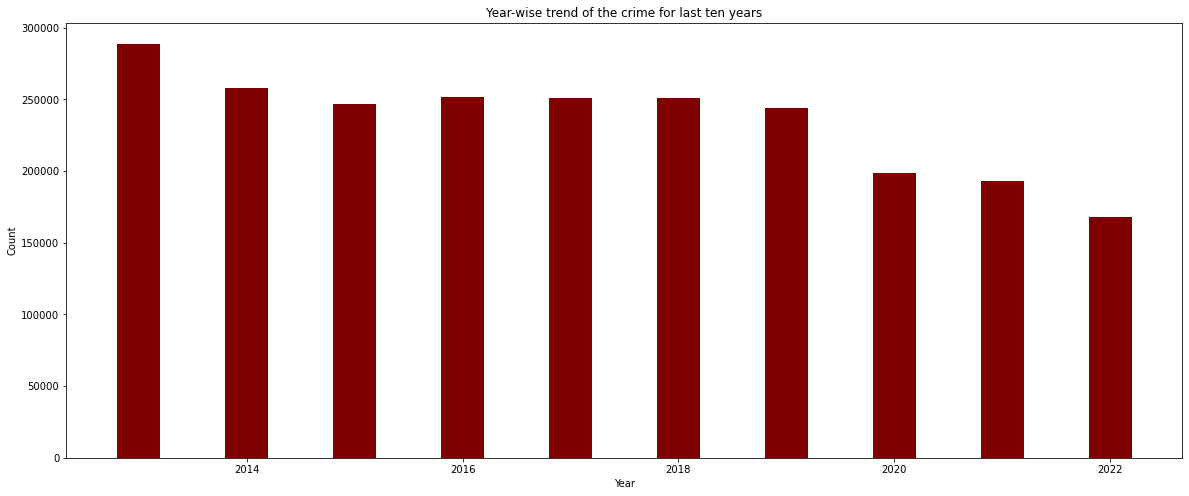

In [18]:
fig = plt.figure(figsize =(20, 8))
plt.bar(Year, count, color ='maroon',width = 0.4) 
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Year-wise trend of the crime for last ten years")
plt.show()

In [19]:
from pyspark.sql.functions import col,hour

In [20]:
Chicago_df1=Chicago_df1.withColumn("hour", hour(col("Date")))

In [21]:
Hours=[]
count2=[]
for i, j in Chicago_df1.groupBy('hour').count().collect():
    Hours.append(i)
    count2.append(j)

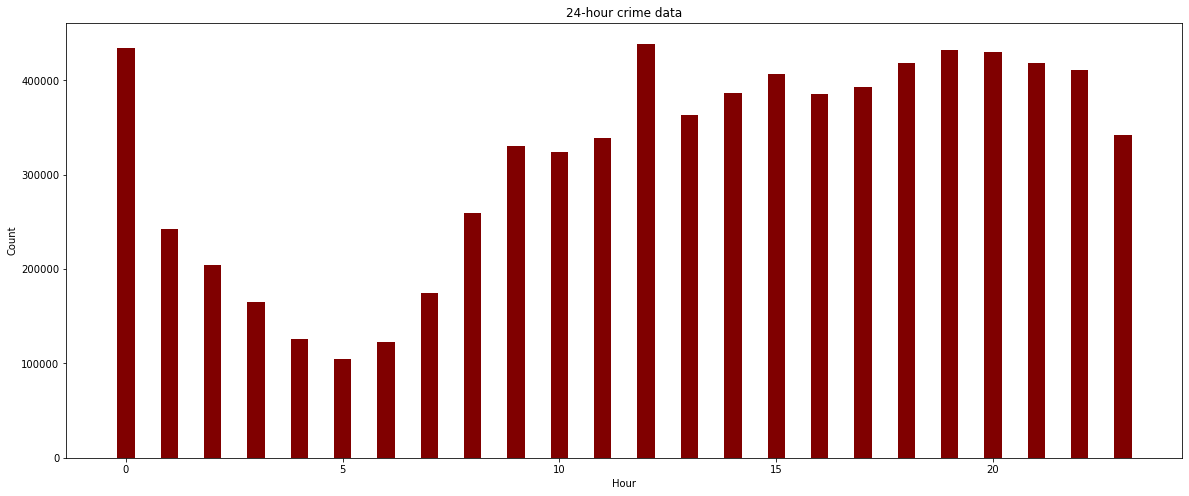

In [22]:
fig = plt.figure(figsize =(20, 8))
plt.bar(Hours, count2, color ='maroon',width = 0.4) 
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("24-hour crime data")
plt.show()

#### Plotting top ten crimes

In [23]:
Crime_types=[]
count1=[]
for i, j in Chicago_df.groupBy('PrimaryType').count().collect():
    Crime_types.append(i)
    count1.append(j)

22/10/20 19:29:30 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Primary Type
 Schema: PrimaryType
Expected: PrimaryType but found: Primary Type
CSV file: file:///Users/vinaykota/Downloads/Crimes_-_2001_to_Present.csv


In [24]:
import pandas

<AxesSubplot:title={'center':'Top ten crimes'}, xlabel='Crime_type', ylabel='count'>

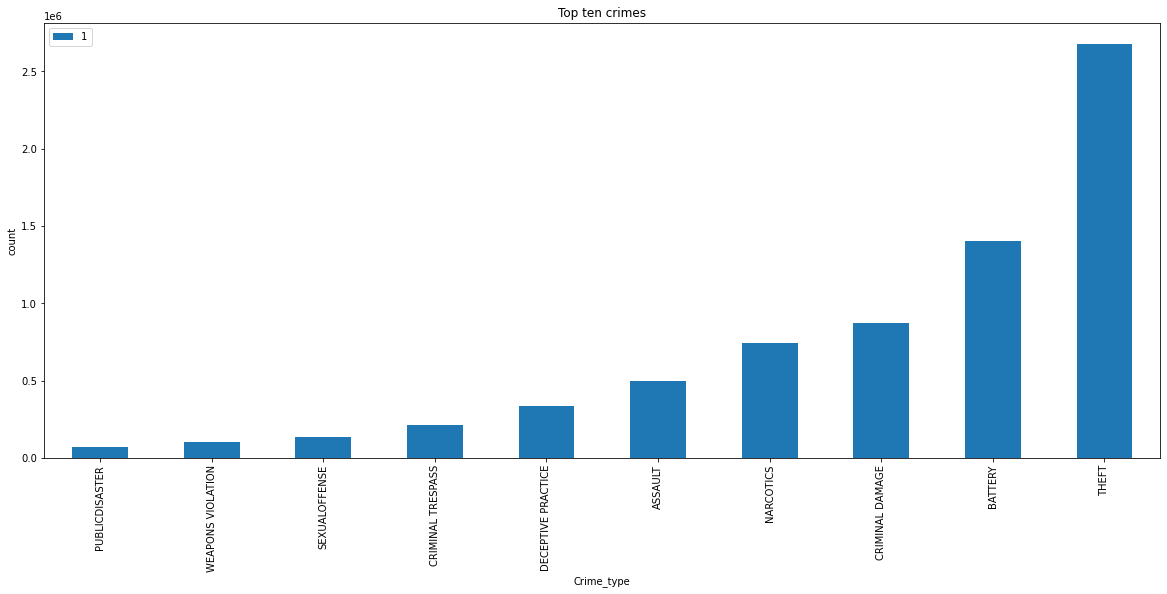

In [25]:
pandas.DataFrame([Crime_types,count1]).T.sort_values(1).set_index(0).tail(10).plot(kind='bar',
                                                  figsize=(20,8),
                                                  title = 'Top ten crimes',
                                                  xlabel='Crime_type',
                                                  ylabel='count',
                                                    )